<a href="https://colab.research.google.com/github/FaizalLeviansyah/Machine_Learning-2023/blob/main/%5BGROUP_2_MIDTERM%5DImage_Segmentation_Clustering_StudyCase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 2
- Adinda Rahajeng Silvia Pranesti/02/2141720158
- Faizal Leviansyah/05/21u41720246
- Khafillah Akbar Syahputra/11/2141720152
- Muhammad Adhika Isa Nugraha/13/2141720267
- Muhammad Fahmi Huwaidi/16/2141720153


# Case Study - Image Segmentation Using Clustering

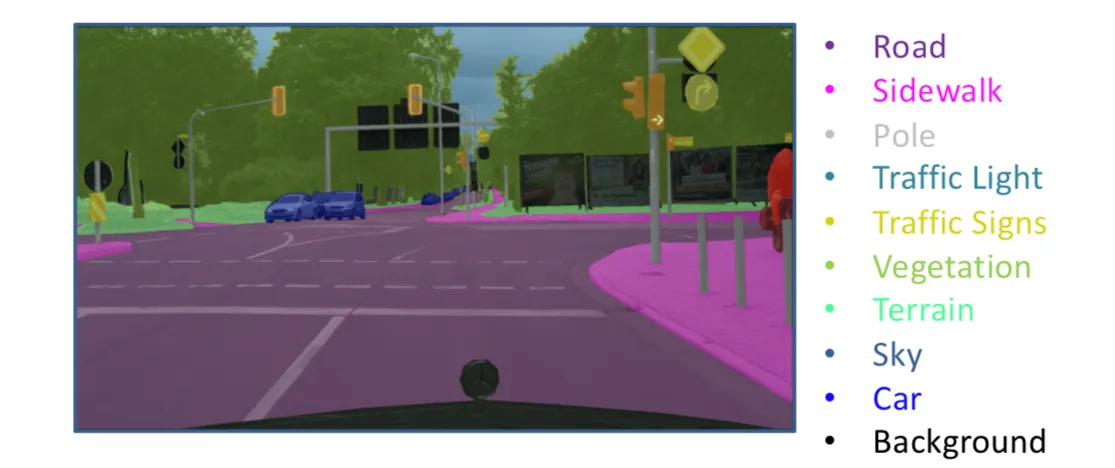

Segmentation is one of the methods used to distinguish one object from another in an image. This can be done by grouping the pixel values in the image based on their color proximity.

In this midterm exam, you are asked to perform segmentation of vehicle license plates in Indonesia. The purpose of segmentation in this case is to facilitate the reading of the license plate before further processes, such as character recognition on the license plate.

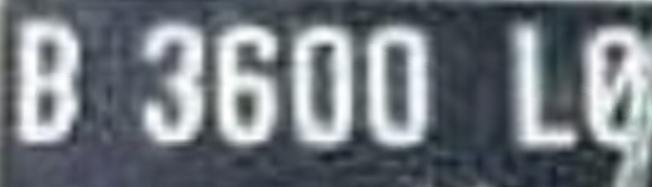

# Midterm Exam's Rules

Based on the given case presentation, you are required to:

1. Select 5 license plate images for each group member from the provided dataset. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Perform segmentation on the license plate images to enhance the characters on the license plates.
3. You can use the K-Means algorithm as explained in previous practical sessions or any other clustering algorithm.
4. You are allowed to perform data preprocessing on the images, such as:
    - a Changing the color space
    - b Dimension reduction
5. Display a comparison of the images before and after segmentation.

**Open Challenge** (Optional)
- How can you evaluate the results of the segmentation?
- Apply it to this case!

**Note:**
1. The image loading process is exemplified using the OpenCV library.
2. By default, OpenCV will load images in the BGR format.

# Code Answer


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
pip install opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Number 4A**

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)


In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

NameError: ignored

###**Number 4B**

In [ ]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Baca gambar asli menggunakan OpenCV
original_image = cv2.imread('/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/BM9098V_PNG.rf.36b28183ada2d698e331cfffcfe2f1d0.jpg')

# Periksa apakah gambar berhasil dimuat
if original_image is not None:
    # Konversi gambar ke Grayscale
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Buat objek PCA dengan jumlah komponen yang diinginkan (misalnya, 10)
    n_components = 10  # Ganti sesuai kebutuhan
    pca = PCA(n_components=n_components)

    # Terapkan PCA ke data gambar
    reduced_image = pca.fit_transform(grayscale_image)

    # Kembalikan data ke bentuk asli
    reconstructed_image = pca.inverse_transform(reduced_image)



###**NUMBER 1,2,3,5**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load and preprocess each license plate image
def preprocess_image(image_path):
    image = cv2.imread(image_path)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return image, blurred

# 2. Specify the number of clusters for K-Means (enhancing characters)
# Performing K-Means clustering for image segmentation
def kmeans_segmentation(image, k=2):
    height, width, channels = image.shape
    pixels = image.reshape(-1, channels)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    segmented_pixels = kmeans.cluster_centers_[kmeans.labels_].reshape((height, width, channels)).astype(np.uint8)
    return segmented_pixels


# 5. Display images for comparison (before and after segmentation)
# Display images before and after segmentation
def display_images(original_image, segmented_image, title1, title2):
    plt.figure(figsize=(12, 6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title(title1)
    plt.subplot(122), plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)), plt.title(title2)
    plt.show()


# 1. Define the paths to the license plate images for each group member
# Load and preprocess the license plate images
image_paths = [
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/B2520XK_PNG.rf.4e22939a8917f509074397176d67c5e5.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/BM3452A_PNG.rf.0f77ba0375f050d4cdd9b8a36c7ab92b.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/BG1980A_png.rf.0144d9ab803a1ef7c66fad4c8178699f.jpg',
    '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_8 (UTS)/Dummy/dummy/019_jpg.rf.e73938ec62074bbde822f7d5a084bdef.jpg'
]

# 3. Load and preprocess the images, apply K-Means clustering, and display the results
images = [preprocess_image(path) for path in image_paths]

k = 2  # Number of clusters for K-Means
segmented_images = [kmeans_segmentation(image, k) for _, image in images]

# lanjutan nomor 2 untuk mendisplay B & A Segmentation
# Display images before and after segmentation
for i in range(len(image_paths)):
    display_images(images[i][0], segmented_images[i], f'Original Image {i+1}', f'Segmented Image {i+1}')
